In [54]:
import pandas as pd

income_df = pd.read_csv("../data/income_census_data.csv")
zip_df = pd.read_csv("../data/zip_df.csv", index_col=0)

In [55]:
# Cleaning up the Census Income Data
#    NOTE: The census data only includes the top 20 zipcodes with the most violations

# Make first row the header (since this contains actual names of the columns)
income_df.columns = income_df.iloc[0]
income_df = income_df.drop(0)
# Remove all NaN columns from end (percentage data not available)
income_df = income_df.drop(columns=income_df.columns[54:])
# Remove all Annotation columns since they are all NaN
income_df = income_df.filter(regex='^((?!Annotation of).)*$')
# Remove prefix ZCTA5 from zipcode
income_df['Geographic Area Name'] = income_df['Geographic Area Name'].apply(lambda x: x[6:])
income_df = income_df.rename(columns={'Geographic Area Name': 'Location'})
income_df.head()




,Geography,Location,Estimate!!Households!!Total,Margin of Error!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000","Margin of Error!!Households!!Total!!Less than $10,000","Estimate!!Households!!Total!!$10,000 to $14,999","Margin of Error!!Households!!Total!!$10,000 to $14,999","Estimate!!Households!!Total!!$15,000 to $24,999","Margin of Error!!Households!!Total!!$15,000 to $24,999",...,"Estimate!!Households!!Total!!$100,000 to $149,999","Margin of Error!!Households!!Total!!$100,000 to $149,999","Estimate!!Households!!Total!!$150,000 to $199,999","Margin of Error!!Households!!Total!!$150,000 to $199,999","Estimate!!Households!!Total!!$200,000 or more","Margin of Error!!Households!!Total!!$200,000 or more",Estimate!!Households!!Median income (dollars),Margin of Error!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars),Margin of Error!!Households!!Mean income (dollars)
1,8600000US02021,02021,9238,315,2.1,1.3,4.0,1.6,5.0,3.0,...,18.7,3.4,11.9,3.0,22.9,3.0,107442,9140,139759,9567
2,8600000US02114,02114,7235,466,6.3,1.8,4.4,2.1,4.6,2.0,...,16.2,3.4,12.6,2.8,23.6,3.8,107162,7437,151154,12776
3,8600000US02116,02116,12014,595,8.7,1.9,5.3,1.5,4.4,1.2,...,13.4,1.8,10.6,1.9,31.8,2.7,115825,9166,213098,16874
4,8600000US02118,02118,13672,658,12.9,2.9,9.1,2.9,11.0,2.4,...,8.8,1.4,9.9,2.1,20.8,2.5,62850,9935,136215,11581
5,8600000US02119,02119,11738,681,21.1,3.2,10.9,2.1,12.2,2.9,...,9.4,2.0,4.1,1.4,2.8,1.1,32424,5167,53861,4395


In [56]:
# Select top 20 zip codes (since that is what we're using for the census data)
zip_df = zip_df.sort_values('Total', ascending=False)
top_zip_df = zip_df.nlargest(20, 'Total')
top_zip_df.head(20)

,Location,Hot Water,Potable Water,Heating Facilities Required,Temperature Requirements,Asbestos Material,Use of Lead Paint Prohibited,Safe Condition,Smoke Detectors and Carbon Monoxide Alarms,Total
3,02128,9.0,0.0,20.0,11.0,0.0,0.0,4.0,51.0,95.0
2,02124,9.0,2.0,9.0,9.0,0.0,0.0,1.0,62.0,92.0
1,02121,12.0,1.0,15.0,11.0,0.0,1.0,1.0,51.0,92.0
7,02114,5.0,0.0,13.0,9.0,0.0,0.0,5.0,45.0,77.0
0,02119,16.0,0.0,11.0,8.0,0.0,0.0,1.0,29.0,65.0
11,02127,4.0,0.0,18.0,9.0,0.0,0.0,1.0,29.0,61.0
5,02130,8.0,1.0,11.0,5.0,0.0,0.0,2.0,23.0,50.0
6,02126,7.0,0.0,6.0,1.0,0.0,0.0,3.0,30.0,47.0
4,02118,9.0,0.0,8.0,4.0,0.0,0.0,0.0,22.0,43.0
10,02136,5.0,0.0,1.0,0.0,0.0,1.0,2.0,34.0,43.0


In [59]:
# Merge the data frames
income_df.shape

income_violations_zip = income_df.merge(top_zip_df)
income_violations_zip.head()

,Geography,Location,Estimate!!Households!!Total,Margin of Error!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000","Margin of Error!!Households!!Total!!Less than $10,000","Estimate!!Households!!Total!!$10,000 to $14,999","Margin of Error!!Households!!Total!!$10,000 to $14,999","Estimate!!Households!!Total!!$15,000 to $24,999","Margin of Error!!Households!!Total!!$15,000 to $24,999",...,Margin of Error!!Households!!Mean income (dollars),Hot Water,Potable Water,Heating Facilities Required,Temperature Requirements,Asbestos Material,Use of Lead Paint Prohibited,Safe Condition,Smoke Detectors and Carbon Monoxide Alarms,Total
0,8600000US02021,02021,9238,315,2.1,1.3,4.0,1.6,5.0,3.0,...,9567,1.0,0.0,5.0,1.0,0.0,0.0,1.0,8.0,16.0
1,8600000US02114,02114,7235,466,6.3,1.8,4.4,2.1,4.6,2.0,...,12776,5.0,0.0,13.0,9.0,0.0,0.0,5.0,45.0,77.0
2,8600000US02116,02116,12014,595,8.7,1.9,5.3,1.5,4.4,1.2,...,16874,0.0,0.0,2.0,5.0,0.0,0.0,0.0,11.0,18.0
3,8600000US02118,02118,13672,658,12.9,2.9,9.1,2.9,11.0,2.4,...,11581,9.0,0.0,8.0,4.0,0.0,0.0,0.0,22.0,43.0
4,8600000US02119,02119,11738,681,21.1,3.2,10.9,2.1,12.2,2.9,...,4395,16.0,0.0,11.0,8.0,0.0,0.0,1.0,29.0,65.0


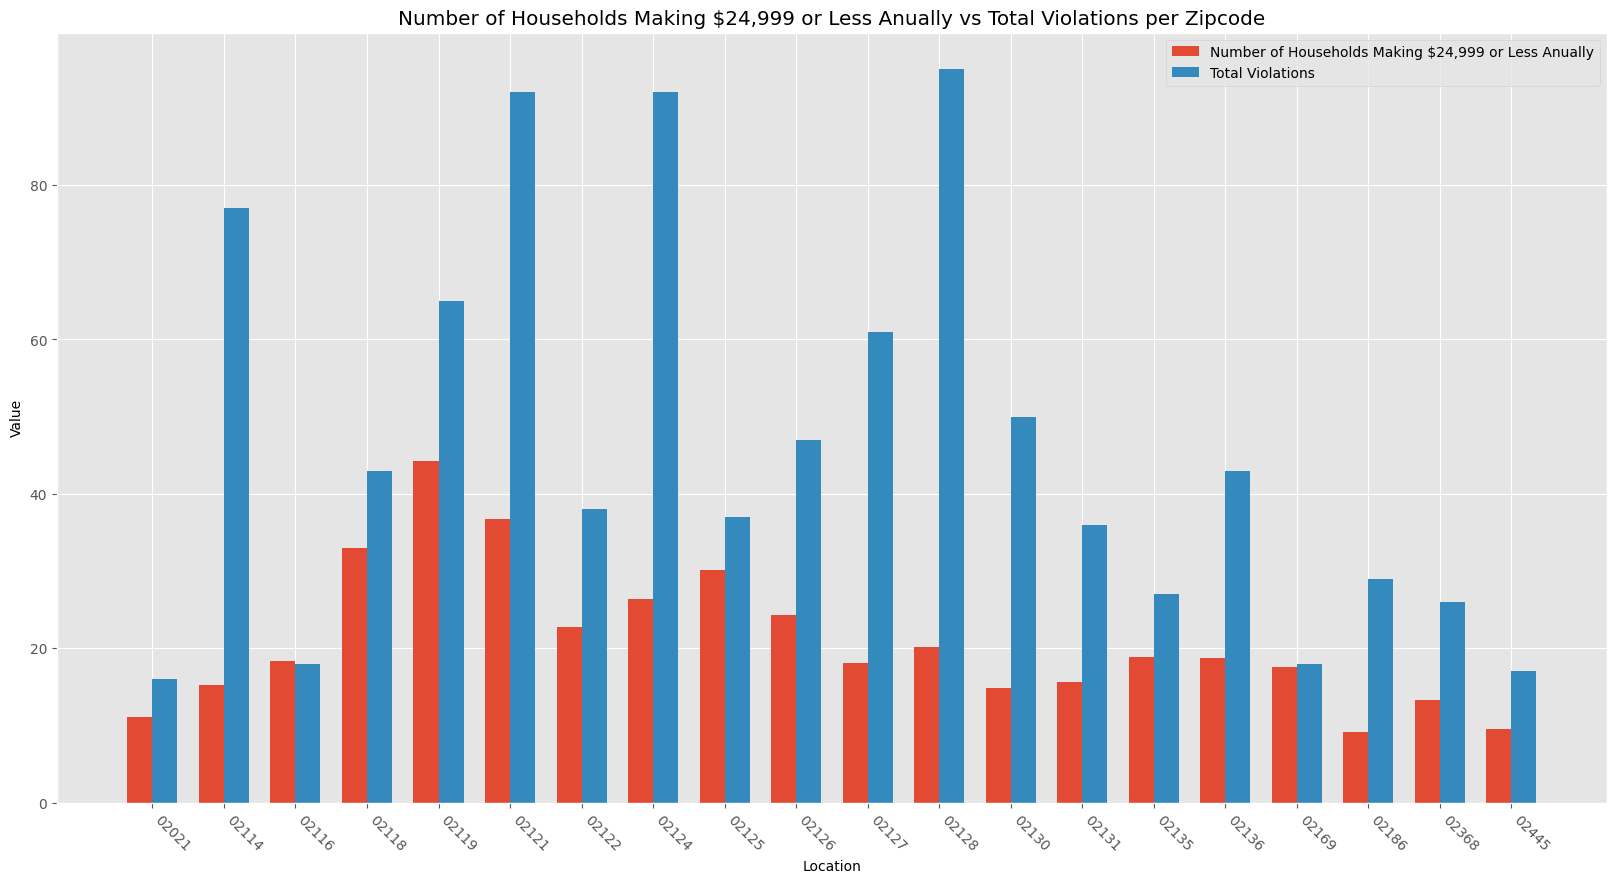

In [76]:
# Try Plotting something
# Maybe do percetage of households at x dollars vs normalized total?
# Or total vs. number households ina specific income bracket
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# visualization
# Set the style for the plot
plt.style.use('ggplot')

bar_width = 0.35

# Create the x values
locations = np.arange(len(income_violations_zip['Location']))

# # Create a bar chart
fig, ax = plt.subplots(figsize=(20, 10))

bar1 = ax.bar(locations - bar_width/2,income_violations_zip['Estimate!!Households!!Total!!Less than $10,000'].apply(lambda x: float(x)) + income_violations_zip['Estimate!!Households!!Total!!$10,000 to $14,999'].apply(lambda x: float(x)) + income_violations_zip['Estimate!!Households!!Total!!$15,000 to $24,999'].apply(lambda x: float(x)),
               bar_width, label='Number of Households Making $24,999 or Less Anually')
bar2 = ax.bar(locations + bar_width/2, income_violations_zip['Total'], bar_width, label='Total Violations')

#/int(income_violations_zip['Estimate!!Households!!Total'])

# Set labels and title
ax.set_xlabel('Location')
ax.set_ylabel('Value')
ax.set_title('Number of Households Making $24,999 or Less Anually vs Total Violations per Zipcode')
ax.set_xticks(locations)
ax.set_xticklabels(income_violations_zip['Location'])
plt.xticks(rotation=-45, ha = 'left')
ax.legend()

# Display the plot
plt.show()